<a href="https://colab.research.google.com/github/HectorGtz27/FlameForeCastModel/blob/main/EMILIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALISIS**



Importar las bibliotecas

In [71]:
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter



Leer los datos

In [72]:
df = pd.read_csv('DataSet23.csv', parse_dates=['Datetime'])
print(df.head())


   latitude  longitude  brightness  confidence daynight      hora       fecha  \
0   30.8342  -110.8534       322.0          68        D  21:00:00  24/02/2016   
1   31.2519  -110.9623       313.8          32        D  18:00:00  30/03/2016   
2   31.0972  -110.8965       325.5          67        D  17:00:00  03/04/2016   
3   31.0988  -110.9110       339.3          86        D  17:00:00  03/04/2016   
4   30.7656  -110.8255       301.6          43        N  09:00:00  04/04/2016   

             Datetime  fuego   Unnamed: 9  
0 2016-02-24 21:00:00       1         NaN  
1 2016-03-30 18:00:00       1         NaN  
2 2016-03-04 17:00:00       1         NaN  
3 2016-03-04 17:00:00       1         NaN  
4 2016-04-04 09:00:00       1         NaN  


Agrupar los registros por día

In [73]:
# Group the records by day
vPd = df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPd.head()


,Datetime,count
0,2016-02-24,1
1,2016-02-25,0
2,2016-02-26,0
3,2016-02-27,0
4,2016-02-28,0


Agrupar los registros por mes

In [74]:
# Group the records by month
vPm = df.groupby([pd.Grouper(key='Datetime', freq='M')]).size().reset_index(name='count')

# Show the first few rows of the dataframe to understand its structure
vPm.head()


,Datetime,count
0,2016-02-29,1
1,2016-03-31,3
2,2016-04-30,4
3,2016-05-31,2
4,2016-06-30,1


Obtener los nombres de los meses

In [75]:
# Get the names of the months from the 'Datetime' column in the vPm DataFrame
month_names = vPm["Datetime"].dt.month_name()
month_names.head()


0    February
1       March
2       April
3         May
4        June
Name: Datetime, dtype: object

Generar un gráfico con las frecuencias de registros por día

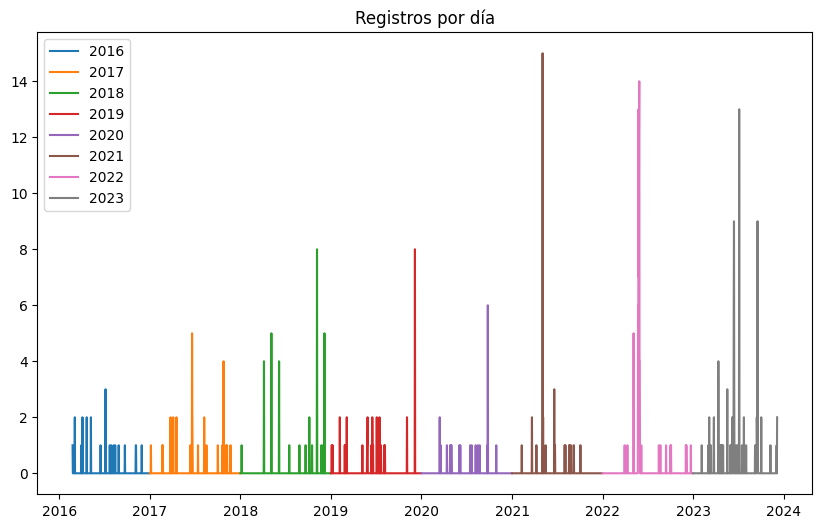

In [76]:
# Define a function to format the y-axis labels
def format_y_tick(tick_val, tick_pos):
    return f'{int(tick_val):,}'

# Plot the data
fig = plt.figure(figsize=(10, 6))
for year in vPd['Datetime'].dt.year.unique():
    data = vPd[vPd['Datetime'].dt.year == year]
    plt.plot(data['Datetime'], data['count'], label=year)

plt.title('Registros por día')
plt.ticklabel_format(axis='y', style='plain')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))
plt.legend()
plt.show()


Frecuencia de Registros por Mes

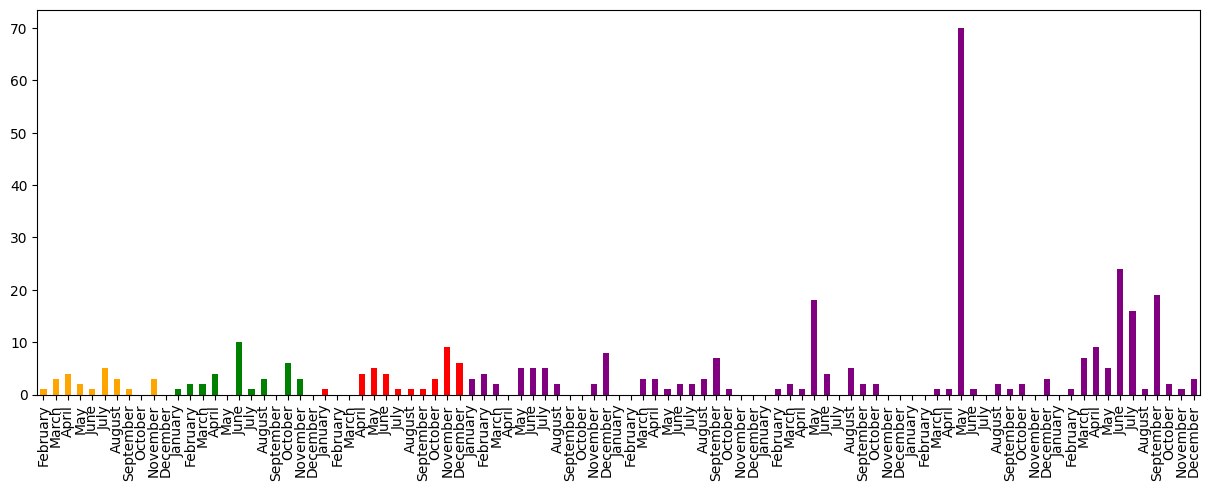

In [77]:
# Define a function to assign a color to each year
def assign_color(row):
    year = row.Datetime.year
    if year == 2015:
        return 'blue'
    elif year == 2016:
        return 'orange'
    elif year == 2017:
        return 'green'
    elif year == 2018:
        return 'red'
    else:
        return 'purple'

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPm.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPm["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPm["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


Frecuencia de Registros por Mes

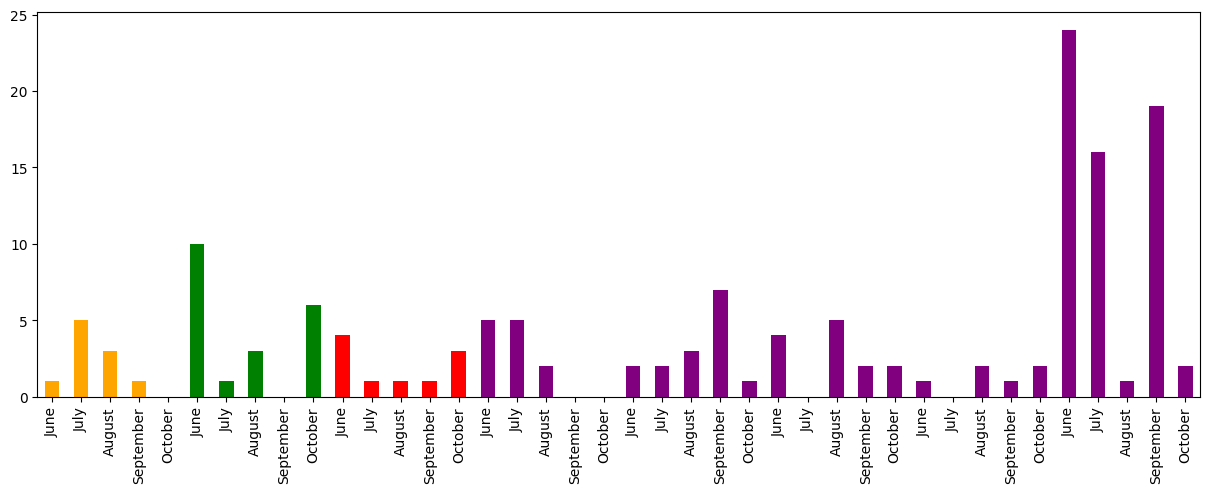

In [78]:
# Filter the data to include only the months from June to October
vPmPrincipal = vPm[(vPm["Datetime"].dt.month > 5) & (vPm["Datetime"].dt.month < 11)]

# Apply the function to each row of the dataframe to generate a list of colors
colors = vPmPrincipal.apply(assign_color, axis=1)

# Generate the bar chart
ax = vPmPrincipal["count"].plot(kind='bar', figsize=(15, 5), color=colors)

# Change the x-axis labels
ax.set_xticklabels(vPmPrincipal["Datetime"].dt.month_name())

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Set the y-axis tick formatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_tick))

# Show the plot
plt.show()


# **GENERACION DE MAPAS DE CALOR**

In [79]:
%%time
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Lee el archivo CSV
df = pd.read_csv('DataSet23.csv', parse_dates=['Datetime'])

# Muestra el dataframe
print(df)


     latitude  longitude  brightness  confidence daynight      hora  \
0    30.83420 -110.85340      322.00          68        D  21:00:00   
1    31.25190 -110.96230      313.80          32        D  18:00:00   
2    31.09720 -110.89650      325.50          67        D  17:00:00   
3    31.09880 -110.91100      339.30          86        D  17:00:00   
4    30.76560 -110.82550      301.60          43        N  09:00:00   
..        ...        ...         ...         ...      ...       ...   
347  30.81045 -110.98147      324.69          11        D  20:00:00   
348  30.86238 -110.95789      332.71          74        D  20:00:00   
349  30.87167 -110.95984      333.47          56        D  20:00:00   
350  30.87224 -110.97795      305.98          66        N  04:00:00   
351  30.87553 -110.96106      307.48          72        N  04:00:00   

          fecha            Datetime  fuego   Unnamed: 9  
0    24/02/2016 2016-02-24 21:00:00       1         NaN  
1    30/03/2016 2016-03-30 18:0

Datos minimos y maximos

In [80]:
# Calculate the minimum and maximum latitude and longitude
latMin = df["latitude"].min()
latMax = df["latitude"].max()
lonMin = df["longitude"].min()
lonMax = df["longitude"].max()

# Define the grid size in degrees
grados = 0.05

(latMin, latMax, lonMin, lonMax, grados)


(30.7387, 31.3099, -111.23656, -110.6363, 0.05)

Se calculan las dimensiones en funcion de la latitud y la longitud

In [81]:
import math

# Calculate the length of the grid in the y-axis (latitude)
yLen = math.ceil((latMax - latMin) / 0.045 + 1)

# Calculate the length of the grid in the x-axis (longitude)
xLen = math.ceil(abs((lonMin - lonMax) / 0.045 - 1))

(yLen, xLen)


(14, 15)

Se calculas las coordenadas de la cuadricula X y Y para cada putno de datos y las he almacenado en nuevas columnas en el DataFrame. Las columnas X y Y han sido convertidas a enteros.

In [82]:
# Calculate the grid coordinates for each data point and store them in new columns 'x' and 'y'
df["y"] = ((latMax - df["latitude"]) / grados)
df["x"] = ((abs(lonMin - df["longitude"])) / grados)

# Convert the 'x' and 'y' columns to integers
df = df.astype({'x': 'int', 'y': 'int'})

# Show the first few rows of the dataframe to confirm the new columns
df.head()


,latitude,longitude,brightness,confidence,daynight,hora,fecha,Datetime,fuego,Unnamed: 9,y,x
0,30.8342,-110.8534,322.0,68,D,21:00:00,24/02/2016,2016-02-24 21:00:00,1,NaN,9,7
1,31.2519,-110.9623,313.8,32,D,18:00:00,30/03/2016,2016-03-30 18:00:00,1,NaN,1,5
2,31.0972,-110.8965,325.5,67,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,NaN,4,6
3,31.0988,-110.9110,339.3,86,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,NaN,4,6
4,30.7656,-110.8255,301.6,43,N,09:00:00,04/04/2016,2016-04-04 09:00:00,1,NaN,10,8


DataSet

In [83]:
df

,latitude,longitude,brightness,confidence,daynight,hora,fecha,Datetime,fuego,Unnamed: 9,y,x
0,30.83420,-110.85340,322.00,68,D,21:00:00,24/02/2016,2016-02-24 21:00:00,1,NaN,9,7
1,31.25190,-110.96230,313.80,32,D,18:00:00,30/03/2016,2016-03-30 18:00:00,1,NaN,1,5
2,31.09720,-110.89650,325.50,67,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,NaN,4,6
3,31.09880,-110.91100,339.30,86,D,17:00:00,03/04/2016,2016-03-04 17:00:00,1,NaN,4,6
4,30.76560,-110.82550,301.60,43,N,09:00:00,04/04/2016,2016-04-04 09:00:00,1,NaN,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...
347,30.81045,-110.98147,324.69,11,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,NaN,9,5
348,30.86238,-110.95789,332.71,74,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,NaN,8,5
349,30.87167,-110.95984,333.47,56,D,20:00:00,18/09/2023,2023-09-18 20:00:00,1,NaN,8,5
350,30.87224,-110.97795,305.98,66,N,04:00:00,19/09/2023,2023-09-19 04:00:00,1,NaN,8,5


Este código agrupa los datos tanto por hora como por día. De esta manera, podemos entender cuántos registros tenemos en cada intervalo de tiempo. vPh nos da el conteo por hora, y vPd nos da el conteo por día.

In [84]:
# Group the records by hour and by day
vPh = df.groupby([pd.Grouper(key='Datetime', freq='H')]).size().reset_index(name='count')



In [85]:
vPd = df.groupby([pd.Grouper(key='Datetime', freq='D')]).size().reset_index(name='count')



In [86]:
# Show the first few rows of the dataframe grouped by hour to confirm its structure
vPh.head()

,Datetime,count
0,2016-02-24 21:00:00,1
1,2016-02-24 22:00:00,0
2,2016-02-24 23:00:00,0
3,2016-02-25 00:00:00,0
4,2016-02-25 01:00:00,0


In [87]:
vPd

,Datetime,count
0,2016-02-24,1
1,2016-02-25,0
2,2016-02-26,0
3,2016-02-27,0
4,2016-02-28,0
...,...,...
2838,2023-12-02,0
2839,2023-12-03,0
2840,2023-12-04,1
2841,2023-12-05,0


Este código muestra las primeras filas del DataFrame valoresPorHora, que contiene los datos agrupados por hora y coordenadas X y Y. Esto nos da una visión rápida de cómo se ven los datos después del agrupamiento, permitiéndonos confirmar que la estructura del DataFrame es la que esperamos.

In [88]:
# Group the records by hour, x, and y coordinates, then count the number of records for each group
valoresPorHora = df.groupby([pd.Grouper(key='Datetime', freq='H'), 'x', 'y']).size().reset_index(name='count')


In [89]:
# Show the first few rows of the dataframe to confirm its structure
valoresPorHora.head()

,Datetime,x,y,count
0,2016-02-24 21:00:00,7,9,1
1,2016-03-04 17:00:00,6,4,2
2,2016-03-30 18:00:00,5,1,1
3,2016-04-04 09:00:00,8,10,2
4,2016-04-21 17:00:00,10,8,2


Este bloque de código crea una lista de matrices, donde cada matriz representa los datos de una hora específica desde el 24 de febrero de 2016 hasta el 6 de enero de 2023. Cada matriz tiene dimensiones basadas en las longitudes X y Y calculadas previamente.

Dentro de cada matriz, la celda en la posición (y,x) muestra el número de registros en esa ubicación específica y para esa hora específica. Por ejemplo, si hay 5 incendios registrados en una ubicación específica a las 3 PM de un día determinado, entonces la matriz correspondiente a esa hora tendrá un '5' en la celda que representa esa ubicación.

Finalmente, el código muestra la primera matriz generada para verificar que todo funcionó como se esperaba.

In [90]:
from datetime import datetime, timedelta
import numpy as np

# Initialize start and end times for the loop
start_time = datetime(2016, 2, 24, 21, 0)
end_time = datetime(2023, 9, 19, 4, 0)


# Initialize an empty list to store matrices
matrices = []

# Loop through each hour between start_time and end_time
while start_time < end_time:
    # Filter the DataFrame for records corresponding to the current hour
    temp = valoresPorHora[valoresPorHora["Datetime"] == start_time]

    # Initialize a zeros matrix of dimensions (yLen, xLen)
    a = np.zeros((yLen, xLen))

    # If there are records for the current hour, populate the matrix
    if len(temp) > 0:
        for index, row in temp.iterrows():
            a[row["y"], row["x"]] = row["count"]

    # Append the matrix to the list
    matrices.append(a)

    # Increment start_time by one hour
    start_time += timedelta(hours=1)

# Show the first matrix for verification
matrices[0] if matrices else "No matrices generated"


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Este bloque de código calcula la suma total de valores contenidos en las matrices generadas durante el análisis. Cada matriz representa la actividad registrada en una hora específica dentro de un rango de fechas. El código recorre todas las matrices, suma los valores en cada una y muestra el resultado total.

In [91]:
# Initialize an empty numpy array to store the values
valores = np.array([])

# Loop through each matrix in the 'matrices' list
for i in range(len(matrices)):
    # Calculate the sum of values in the current matrix and append it to 'valores'
    valores = np.append(valores, matrices[i].sum())

# Calculate the sum of all the values in 'valores'
total_sum = valores.sum()

# Display the total sum
total_sum


344.0

Este bloque de código analiza una lista de valores y separa aquellos que son iguales a cero de los que no lo son. Los índices de los valores iguales a cero se almacenan en la lista zeroVal, mientras que los índices de los valores distintos de cero se almacenan en la lista valIndex. Esto permite identificar y gestionar los valores nulos o ceros en los datos.

In [92]:
%%time
zeroVal = []
valIndex = []

# Loop through each value in 'valores'
for i in range(len(valores)):
    if valores[i] == 0:
        zeroVal.append(i)
    else:
        valIndex.append(i)


CPU times: user 25.4 ms, sys: 1.02 ms, total: 26.4 ms
Wall time: 27.6 ms


En este segmento, se está calculando la longitud de dos listas:

len(zeroVal) devuelve el número de elementos en la lista zeroVal. Esta lista contiene los índices de los valores en la lista original que son iguales a cero.

len(valIndex) devuelve el número de elementos en la lista valIndex. Esta lista contiene los índices de los valores en la lista original que no son iguales a cero.

En el resultado mostrado, len(zeroVal) tiene un valor de 66116, lo que significa que hay 25443 valores en la lista original que son 203 iguales a cero. Por otro lado, len(valIndex) no se muestra en tu mensaje, pero representaría la cantidad de valores que no son cero en la lista original.

Estas operaciones ayudan a cuantificar la cantidad de ceros y valores distintos de cero en los datos analizados.

In [93]:
len(zeroVal)

66116

In [94]:
len(valIndex)

203

In [100]:
t = 0
i = 0
step = 20
hist = []

# Loop while 'i' is less than the length of 'valIndex' minus 'step'
while i < len(valIndex) - step:
    # Check if the next index is equal to the current index plus 'step'
    if valIndex[i] + step == valIndex[i + step]:
        t = t + 1
        i = i + 5
        hist.append([valIndex[i], valIndex[i + step]])
    else:
        i = i + 1

# Print the value of 't'
t


0